In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Create data from power spectrum

This function is set up to create a single Lorentzian peak and will be used to create several "modes". The mode height and central frequency will be set by the factor $i$ relative to the other input parameters. The mode height will be reduced by a factor $i^2$, and the central freuqency will be shifted by a factor $i$.

In [3]:
def single_lorentzian(x, x_0, A, width, i, r=0):
    model = ((2*A**2 / (np.pi*width*i**2)) / (1 + (2*(x-((1e6/(24*3600))*r + i*x_0)) / width)**2))
    return model

def classic_SHO(x, x_0, S, Q, i):
    """
    Build lorentzian under method which has quadratic terms in angular freq.
    
    Args:
        x: freq [Hz]
        x_0: principle freq of mode [Hz]
        S: amplitude
        Q: quality factor
        i: interger for which mode (i=1 for fundamental mode)
    """
    x = 2*np.pi*x # convert freq to angular freq [rad/s]
    x_0 = 2*np.pi*x_0 # convert freq to angular freq [rad/s]
    model = np.sqrt(2/np.pi) * ( S * x_0**4 / ((x**2 - (i*x_0)**2)**2 + (x**2 * x_0**2 / Q**2)))
    return model**0.5

Here we create and plot the power spectrum of the artificial data, to have a peak at the 27-rotation period ($\nu_0$) with 4 harmonics $n \, \nu_0$ for n in range 2-5.

Power = 2436794044041.723
c.Power = 23272777676.00963


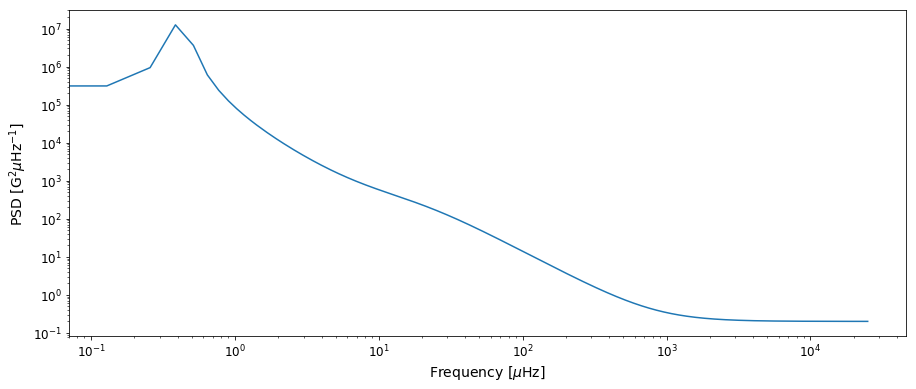

Peak at nu_0 = 0.3858 muHz


In [17]:
dx = 0.1286 # Resolution 0.1286 muHz (90 days ~= 3 mths)
x = np.arange(0, (1*1e6/(40)), dx) # Nyquist = 40 s 
x_0 = (1e6/(3600*24*27)) # Central frequency of fundamental peak (i.e. 27-day peak ~= 0.43 muHz)
A = 2100 # Amplitude of fundamental peak [G]
width = 0.04 # Width [muHz]

# Lorentzians
powers = [single_lorentzian(x, x_0, A, width, i) for i in np.arange(1,2)] # Create peak(s)
powers = np.sum(powers, axis=0) # Sum single peak(s) together into one power spectrum
powers1 = [single_lorentzian(x, x_0, 0.2*A, width, i, r=1) for i in np.arange(1,5)] # Create peak(s)
powers1 = np.sum(powers1, axis=0) # Sum single peak(s) together into one power spectrum
powers2 = [single_lorentzian(x, -1*x_0, 0.2*A, width, i, r=1) for i in np.arange(1,5)] # Create peak(s)
powers2 = np.sum(powers2, axis=0) # Sum single peak(s) together into one power spectrum
powers3 = [single_lorentzian(x, x_0, 0.1*A, width, i, r=2) for i in np.arange(1,5)] # Create peak(s)
powers3 = np.sum(powers3, axis=0) # Sum single peak(s) together into one power spectrum
powers4 = [single_lorentzian(x, -1*x_0, 0.1*A, width, i, r=2) for i in np.arange(1,5)] # Create peak(s)
powers4 = np.sum(powers4, axis=0) # Sum single peak(s) together into one power spectrum
powers5 = [single_lorentzian(x, x_0, 0.075*A, width, i, r=3) for i in np.arange(1,5)] # Create peak(s)
powers5 = np.sum(powers5, axis=0) # Sum single peak(s) together into one power spectrum
powers6 = [single_lorentzian(x, -1*x_0, 0.075*A, width, i, r=3) for i in np.arange(1,5)] # Create peak(s)
powers6 = np.sum(powers6, axis=0) # Sum single peak(s) together into one power spectrum
powers7 = [single_lorentzian(x, x_0, 0.03*A, width, i, r=4) for i in np.arange(1,5)] # Create peak(s)
powers7 = np.sum(powers7, axis=0) # Sum single peak(s) together into one power spectrum
powers8 = [single_lorentzian(x, -1*x_0, 0.03*A, width, i, r=4) for i in np.arange(1,5)] # Create peak(s)
powers8 = np.sum(powers8, axis=0) # Sum single peak(s) together into one power spectrum
""" testing, playing around with adding 1/day repetitions
powers2 = [single_lorentzian(x-11.57, x_0, A, width, i) for i in np.arange(1,5)] # Create peak(s)
powers += 0.2*np.sum(powers2, axis=0) # Sum single peak(s) together into one power spectrum
powers2 = [single_lorentzian(x-11.57, -1*x_0, A, width, i) for i in np.arange(1,5)] # Create peak(s)
powers += 0.2*np.sum(powers2, axis=0) # Sum single peak(s) together into one power spectrum
"""
print("Power = %s"%(np.sum(powers * dx * 1e6)))
powers = powers + 0.2 #+ powers1 + powers2 + powers3 + powers4 + powers5 + powers6 + powers7 + powers8# Add a bkgnd level of 1

# Classic SHOs
S = 200000000
Q = 1000*x_0/width
c_powers = [classic_SHO(x, x_0, S, Q, i) for i in np.arange(1,2)] # Create peak(s)
c_powers = np.sum(c_powers, axis=0) # Sum single peak(s) together into one power spectrum
print("c.Power = %s"%(np.sum(c_powers * dx * 1e6)))
c_powers = c_powers + 0.25 # Add a bkgnd level of 1

# background Harvey component
sigma = 100#1400
tau = 0.009
powers += (4*sigma**2*tau)/(1 + (2*np.pi*x*tau)**2)
#powers /= 1e6

# Plot peaks
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Frequency [$\mu$Hz]', fontsize=14)
ax.set_ylabel('PSD [G$^2$$\mu$Hz$^{-1}$]', fontsize=14)
ax.tick_params(labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, powers)
#ax.plot(x, c_powers) #classic SHO
plt.show()

print("Peak at nu_0 = %s muHz"%x[np.argmax(powers)])

Now we need to convert the signal from PSD into amplitude ($A(f(k))$): $A(f(k)) \, = \, \sqrt{2 \,\mathrm{PSD}}$

BUT - first need to go from PSD in units [G$^2$$\mu$Hz$^{-1}$] into [G$^2$]

Then to convert from amplitude to the frequency domain signal ($Z(f(k))$): $Z(f(k)) \, = \, A(f(k)) \, e^{i \phi(f(k)))}$, where $\phi(f(k))$ is some random phase supplied to the signal between $0$ and $2\pi$.

In [ ]:
powers *= dx*1e6 # Change into units [G^2]

Time series length: 194402
Time series length: 194402
(194402,) 194402 194402
[4.35457746 6.00403484 4.90010551 ... 4.80100385 5.13688865 5.12356569]


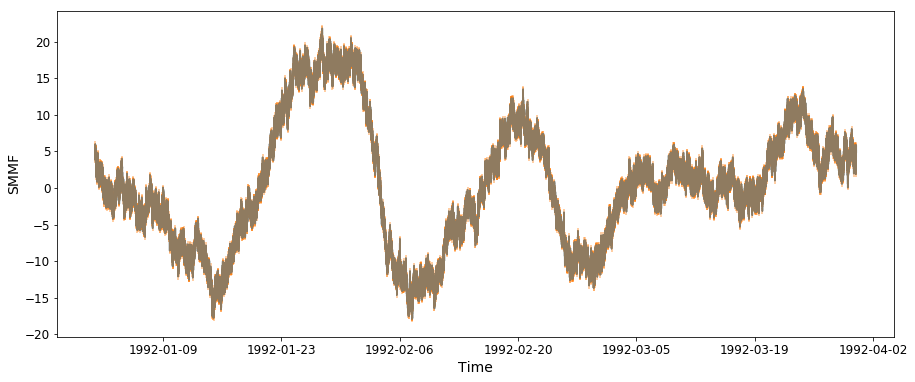

Time-series real component variance: 69.7305412583537


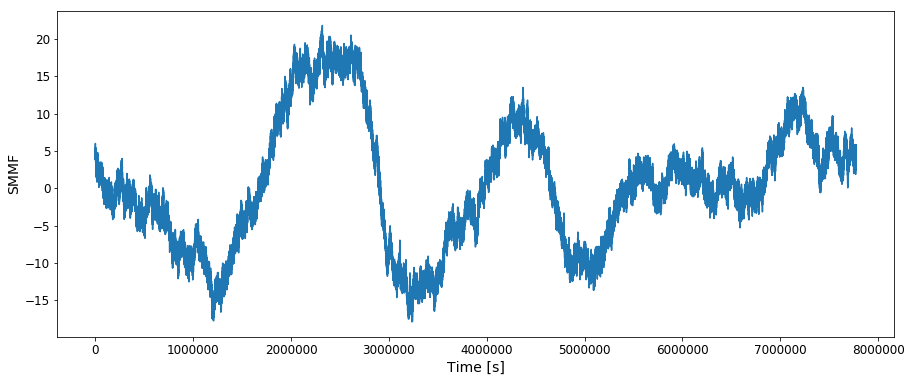

In [18]:
# This is overtaken by the method below
amplitudes = np.sqrt(powers) # Compute amplitudes from powers
phases = np.random.uniform(0, 2*np.pi, len(amplitudes)) # Generate random phases
freq_sigs = [a*np.exp(1j*p) for a,p in zip (amplitudes, phases)] # Conversion to frequency domain signal
time_series = np.fft.ifft(freq_sigs) # Compute discrete FFT (probably not correct!)
t = np.arange(len(time_series)) # Time array [40 s]
ts = t * (40) # Time array [s]
print('Time series length: %s'%(len(time_series)))


noise = np.fft.fft(np.random.randn(len(powers)))
amp_spec = noise * 1 * np.sqrt(powers)
time_series = np.fft.irfft(amp_spec, n=len(powers))
t = np.arange(len(time_series)) # Time array [40 s]
ts = t * (40) # Time array [s]
print('Time series length: %s'%(len(time_series)))
print(noise.shape, len(powers), len(time_series))
print(time_series)
# Put the time series into a pandas DataFramd with the index as time since 01/01/1992
df = pd.DataFrame({'SMMF':time_series.real}, 
                      index=[datetime.datetime(1992,1,1) + datetime.timedelta(seconds=int(ti)) for ti in ts])

# Plot time series
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('SMMF', fontsize=14)
ax.tick_params(labelsize=12)
ax.plot(df.index.values, df['SMMF'])

#yerr = np.random.normal(0, 0.25, len(time_series))
yerr = np.ones(len(time_series))*0.4
ax.errorbar(df.index.values, df['SMMF'], abs(yerr), alpha=0.5)
plt.show()

# Plot time series
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Time [s]', fontsize=14)
ax.set_ylabel('SMMF', fontsize=14)
ax.tick_params(labelsize=12)
ax.plot(ts, df['SMMF'])


print('Time-series real component variance: %s'%(np.std(time_series.real)**2))

Now we should re-do the FFT to ensure that the PSD comes out the same as what we started with.

Begin FFT...
Pre-mask times length: 194402
Fill is: 1.0
Post-mask times length: 194402


/home/exr007/.local/lib/python3.5/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


TS_var: 69.7305412583537
FD: 69.73054125835365


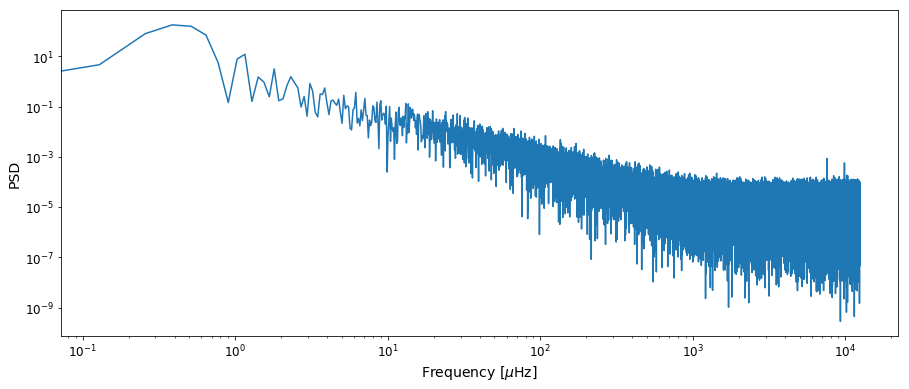

Time-series variance: 69.7305412583537
Peak at nu_0 = 0.385798500015432 muHz


In [19]:
import timeseries_FFT

def FFT(start, end, data = None, oversample = False, plot=False):
    print('Begin FFT...')
    # data = self.Vn_df[0] # set FFT data
    data = data
    error = data*0.0001

    f = timeseries_FFT.timeseries_FFT_plot(data, error, start, end, 'SMMF [G]', 'PSD [$G^2$$\mu$Hz$^{-1}$]', maj_tick = .5, min_tick=.05)
    freqs, power, times = f.FT_data()
    if plot == True:
        f.make_plot()
    return freqs, power, times

# Re-compute the power spectrum
freqs, power, times = FFT(start = pd.to_datetime(df.index.values[0]), end = pd.to_datetime(df.index.values[-1]), data = df['SMMF'], plot=False, oversample=False)

# Plot power re-calculated power spectrum
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Frequency [$\mu$Hz]', fontsize=14)
ax.set_ylabel('PSD', fontsize=14)
ax.tick_params(labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(freqs, power)
plt.show()

print('Time-series variance: %s'%(np.std(df['SMMF'])**2))
print("Peak at nu_0 = %s muHz"%freqs[np.argmax(power)])

This looks ok... the y-axis values are different to those used during the input which should be checked... it could be a mixture of units/mistakes in going from PSD->AMP->TS/general errors that have caused this difference.

The new nyquist is half the original frequency grid, due to the way that I set up the frequency grid initially, but expect this to be $\frac{1}{2 dT}$, whdre $dT$ is the sampling in the time domain.

Now we remove some of the data, to make the data set more comparable to real BiSON data with a fill of around 0.15

In [20]:
start = 900 # skip first 900
take = 360 # retain 100 points at a time
skip = 1800 # skip every 2060 points at a time
indices = np.concatenate([np.arange(i, i + take) for i in range(start, len(df), take + skip)])
print(len(indices))
#print(tst_ary[indices])
t2 = df['SMMF'].index.values[indices]
ts2 = ts[indices]
df2 = df['SMMF'].values[indices]
yerr2 = yerr[indices]
print(df2)

# Repeat again to remove a couple of days
start = 0 
take = 3200 # keep 500 points
skip = 400 # remove 100 points
indices2 = np.concatenate([np.arange(i, i + take) for i in range(start, len(df2), take + skip)])
print('Fill is: %s'%(len(df2[indices2])/len(df)))

df_SMMF = pd.DataFrame({'SMMF':df2[indices2], 'ts':ts2[indices2], 'yerr':yerr2[indices2]}, index=t2[indices2])

32400
[2.07609252 1.30535894 1.07180327 ... 4.31285207 5.49480632 5.61197068]
Fill is: 0.14814662400592588


<ErrorbarContainer object of 3 artists>

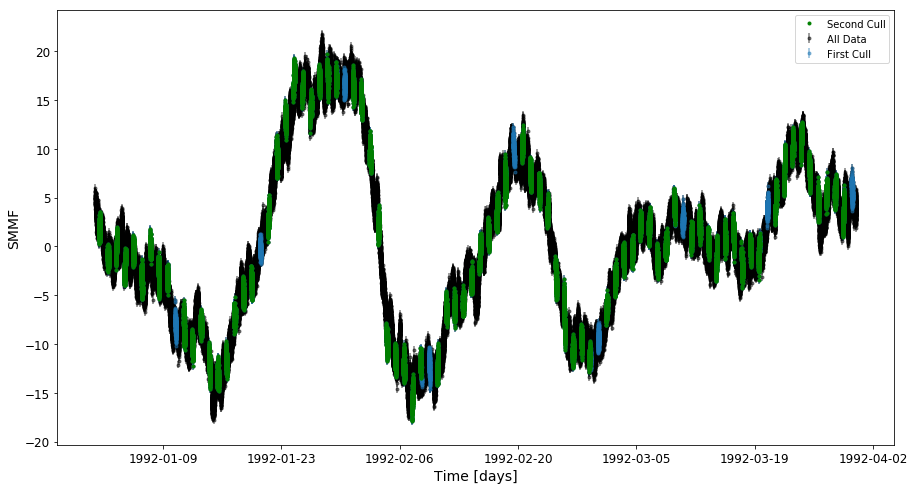

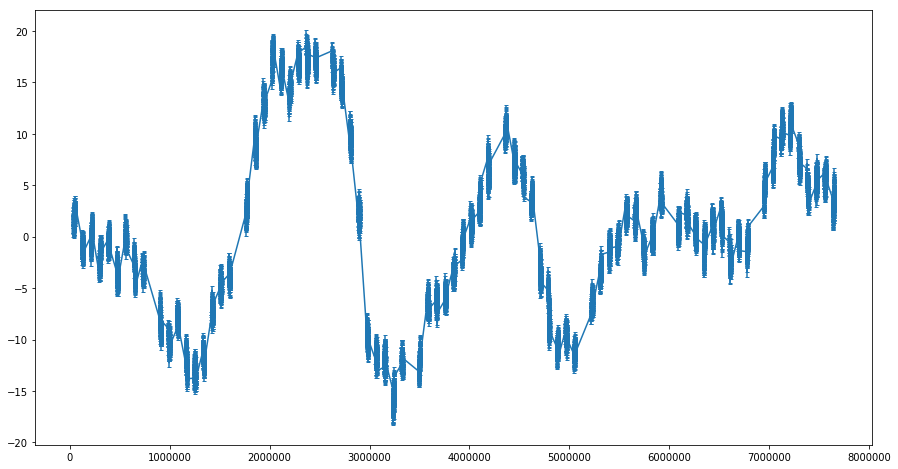

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel('Time [days]', fontsize=14)
ax.set_ylabel('SMMF', fontsize=14)
ax.tick_params(labelsize=12)

ax.errorbar(df.index.values, df['SMMF'].values, yerr=yerr, fmt=".k", alpha= 0.5, capsize=0, label='All Data', zorder=2)
ax.errorbar(df.index.values[indices], df['SMMF'].values[indices], yerr=yerr[indices], alpha= 0.5, fmt=".", capsize=0, label='First Cull', zorder=2)
ax.plot(df_SMMF.index.values, df_SMMF['SMMF'], '.g', label='Second Cull', zorder=3)
plt.legend()

fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(ts, df['SMMF'].values)
#ax.plot(df_SMMF['ts'], df_SMMF['SMMF'])
ax.errorbar(df_SMMF['ts'], df_SMMF['SMMF'], yerr=df_SMMF['yerr'], capsize=2)

Now do one final FT on this gapped data

Begin FFT...
Pre-mask times length: 194402
Fill is: 1.0
Post-mask times length: 194402


/home/exr007/.local/lib/python3.5/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


TS_var: 69.7305412583537
FD: 69.73054125835365


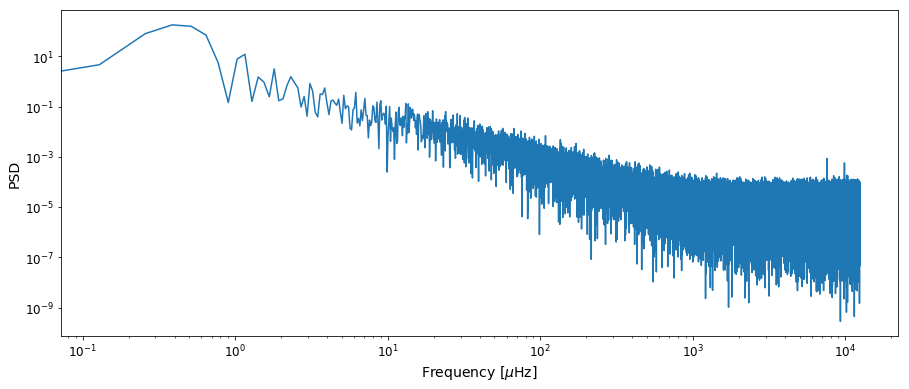

Time-series variance: 69.7305412583537
Peak at nu_0 = 0.385798500015432 muHz


In [22]:
import timeseries_FFT

def FFT(start, end, data = None, oversample = False, plot=False):
    print('Begin FFT...')
    # data = self.Vn_df[0] # set FFT data
    data = data
    error = data*0.0001

    f = timeseries_FFT.timeseries_FFT_plot(data, error, start, end, 'SMMF [G]', 'PSD [$G^2$$\mu$Hz$^{-1}$]', maj_tick = .5, min_tick=.05)
    freqs, power, times = f.FT_data()
    if plot == True:
        f.make_plot()
    return freqs, power, times

# Re-compute the power spectrum
freqs, power, times = FFT(start = pd.to_datetime(df.index.values[0]), end = pd.to_datetime(df.index.values[-1]), data = df['SMMF'], plot=False, oversample=False)

# Plot power re-calculated power spectrum
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Frequency [$\mu$Hz]', fontsize=14)
ax.set_ylabel('PSD', fontsize=14)
ax.tick_params(labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(freqs, power)
plt.show()

print('Time-series variance: %s'%(np.std(df['SMMF'])**2))
print("Peak at nu_0 = %s muHz"%freqs[np.argmax(power)])

## Celerite model

Now we will try to model the time-series using a GP.

Note that we assume Q-factor: $Q \, = \, \frac{\nu_0}{\Gamma}$

In [27]:
import celerite
from celerite import terms
from celerite.modeling import Model

"""
# A real-term
bounds = dict(log_a=(0, 15), log_c=(-15, 15))
kernel = terms.RealTerm(log_a=np.log(10), log_c=-np.log(1.0), bounds=bounds)


# A non-periodic component
Q = 1.0 / np.sqrt(2.0)
w0 = 3.0
S0 = 0.01
#bounds = dict(log_S0=(-15, 20), log_Q=(-15, 15), log_omega0=(-20, 15))
bounds = dict(log_S0=(-15, 15), log_Q=(-15, 15), log_omega0=(-15, 15))
kernel = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                       bounds=bounds)
kernel.freeze_parameter("log_Q")  # We don't want to fit for "Q" in this term
"""

# Jitter Term
bounds = dict(log_sigma=(-15, 15))
kernel = terms.JitterTerm(log_sigma=np.log(0.5), bounds=bounds)

# A periodic component for fundamental harmonic peak
#bounds = dict(log_S0=(-10, 30), log_Q=(-20, 20), log_omega0=(-20, 15))
bounds = dict(log_S0=(-10, 20), log_Q=(-10, 10), log_omega0=(-13.5, -12.6))
Q = 10
#w0 = (1.0 / 27.0 / 2.0 / np.pi)
w0 = 2.0 * np.pi * (1.0 / (27.0*3600*24))
#S0 = np.var(df.SMMF.values) / (w0 * Q) / 10
S0 = np.var(df_SMMF['SMMF']) / (w0 * Q) / 1.0
print(np.log(S0), np.log(Q), np.log(w0))
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                        bounds=bounds)

# A 2nd periodic component for 2nd harmonic
#bounds = dict(log_S0=(-10, 30), log_Q=(-20, 20), log_omega0=(-20, 15))
bounds = dict(log_S0=(-10, 20), log_Q=(-10, 10), log_omega0=(-12.5, -11.90))
Q = 20
#w0 = (1.0 / 27.0 / 2.0 / np.pi)
w0 = 2.0 * np.pi * (1.0 / (13.5*3600*24))
S0 = np.var(df_SMMF['SMMF']) / (w0 * Q) / 2.0
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                        bounds=bounds)

# A 3rd periodic component for 3rd harmonic
#bounds = dict(log_S0=(-10, 30), log_Q=(-20, 20), log_omega0=(-20, 15))
bounds = dict(log_S0=(-10, 20), log_Q=(-10, 10), log_omega0=(-11.75, -10.75))
Q = 20
#w0 = (1.0 / 27.0 / 2.0 / np.pi)
w0 = 2.0 * np.pi * (1.0 / (7*3600*24))
S0 = np.var(df_SMMF['SMMF']) / (w0 * Q) / 2.0
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                        bounds=bounds)


# An SHO component for background
bounds = dict(log_S0=(-15, 30), log_Q=(-30, -1), log_omega0=(-30, -14.25))
Q = 0.1
#w0 = (1.0 / 27.0 / 2.0 / np.pi)
w0 = 2.0 * np.pi * (0.0001/(24*3600))
S0 = np.var(df_SMMF['SMMF']) / (w0 * Q) / 1e6
print(np.log(S0), np.log(Q), np.log(w0))
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                        bounds=bounds)

"""
# A 2nd periodic component for 2nd harmonic
#bounds = dict(log_S0=(-10, 30), log_Q=(-20, 20), log_omega0=(-20, 15))
bounds = dict(log_S0=(-10, 20), log_Q=(-10, 10), log_omega0=(-12.5, -11.9))
Q = 1
#w0 = (1.0 / 27.0 / 2.0 / np.pi)
w0 = 2.0 * np.pi * (1.0 / (13.5*3600*24))
S0 = np.var(df_SMMF['SMMF']) / (w0 * Q) / 1.0
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                        bounds=bounds)
"""
"""
# A 2nd periodic component for 3rd harmonic
#bounds = dict(log_S0=(-10, 30), log_Q=(-20, 20), log_omega0=(-20, 15))
bounds = dict(log_S0=(-15, 15), log_Q=(-5, 5), log_omega0=(-0.5, -0.2))
Q = 10
#w0 = (1.0 / 27.0 / 2.0 / np.pi)
w0 = 3 * 2.0 * np.pi * (1.0 / 27.0)
S0 = np.var(df.SMMF.values) / (w0 * Q)
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                        bounds=bounds)

# A 2nd periodic component for 4th harmonic
#bounds = dict(log_S0=(-10, 30), log_Q=(-20, 20), log_omega0=(-20, 15))
bounds = dict(log_S0=(-15, 15), log_Q=(-5, 5), log_omega0=(-0.2, 0))
Q = 10
#w0 = (1.0 / 27.0 / 2.0 / np.pi)
w0 = 4 * 2.0 * np.pi * (1.0 / 27.0)
S0 = np.var(df.SMMF.values) / (w0 * Q)
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                        bounds=bounds)
"""

# Define the model
class MeanModel(Model):
    parameter_names = ("A", "P")

    def get_value(self, t):
        return self.A * np.sin(2.0 * np.pi * t / self.P)
    
# Create and compute GP
gp = celerite.GP(kernel, mean=np.mean(df_SMMF.SMMF.values), fit_mean=False)
gp.compute(df_SMMF.ts.values, df_SMMF.yerr.values)  # Always need to call compute once
print("Initial log likelihood: %.6f"%(gp.log_likelihood(df_SMMF['SMMF'].values)))
print(gp.get_parameter_vector())

14.762583307365208 2.302585092994046 -12.82470275438713
11.466746441360879 -2.3025850929940455 -18.739206260358984
Initial log likelihood: -35639.839933
[ -0.69314718  14.76258331   2.30258509 -12.82470275  12.68314177
   2.99573227 -12.13155557  12.02636223   2.99573227 -11.47477604
  11.46674644  -2.30258509 -18.73920626]


Note: $Q \sim \nu_0 \Gamma^{-1}$

Create likelihood function for emcee to work with

In [28]:
def log_probability(params, y):
    gp.set_parameter_vector(params)
    lp = gp.log_prior()
    if not np.isfinite(lp):
        return -np.inf
    """# add normal prior on w_0 (mu=27 days, sigma = 2 days)
    mu0 = 2.7E-6
    sigma0 = 0.2E-6
    lp_w0 = np.log(1.0/(np.sqrt(2*np.pi)*sigma0))-0.5*(np.exp(params[3])-mu0)**2/sigma0**2
    # add normal prior on w_0 (mu=13.5 days, sigma = 2 days)
    mu1 = 4.8E-6
    sigma1 = 0.2E-6
    lp_w1 = np.log(1.0/(np.sqrt(2*np.pi)*sigma1))-0.5*(np.exp(params[3])-mu1)**2/sigma1**2
    # add normal prior on w_Harvey (mu=0 Hz, sigma = 1E-9 Hz)
    muH = 1e-10
    sigmaH = 1e-9
    lp_wH = np.log(1.0/(np.sqrt(2*np.pi)*sigmaH))-0.5*(np.exp(params[9])-muH)**2/sigmaH**2
    #if params[0] < 0:
    #    return -np.inf"""
    return gp.log_likelihood(y) #+ lp + lp_w0 + lp_w1 + lp_wH

Run emcee on this

In [ ]:
# Last plot of time-series before emcee

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_SMMF['ts'], df_SMMF['SMMF'], '.')

In [29]:
import emcee

initial = gp.get_parameter_vector()
print(initial)
print(log_probability(initial, df_SMMF['SMMF'].values))

print(type(df_SMMF['SMMF'].values))

ndim, nwalkers = len(initial), 50
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, a=2, args=(df_SMMF['SMMF'].values,))

import time
start_time = time.time()

print("Running burn-in...")
p0 = initial + 0.05* np.random.randn(nwalkers, ndim)
p0, lp, _ = sampler.run_mcmc(p0, 4000)
print("... elapsed_time = %.6f s"%(time.time() - start_time))
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))

print("Running production...")
sampler.reset()
sampler.run_mcmc(p0, 4000);

print("We're done here...")
print("... elapsed_time = %.6f s"%(time.time() - start_time))

print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))

print(gp.get_parameter_vector())

[ -0.69314718  14.76258331   2.30258509 -12.82470275  12.68314177
   2.99573227 -12.13155557  12.02636223   2.99573227 -11.47477604
  11.46674644  -2.30258509 -18.73920626]
-35639.83993334776
<class 'numpy.ndarray'>
Running burn-in...
... elapsed_time = 1130.851367 s
Mean acceptance fraction: 0.188
Running production...
We're done here...
... elapsed_time = 2059.289321 s
Mean acceptance fraction: 0.144
[ -0.73936433  -3.72788611  -6.16274242 -13.61635764 -11.53678322
 -18.88691474 -12.47119094  20.00209657  -3.30046896 -10.75066993
   2.07456412 -32.36701728 -35.05976106]


(200000, 13)


Text(0.5,0,'Step Number')

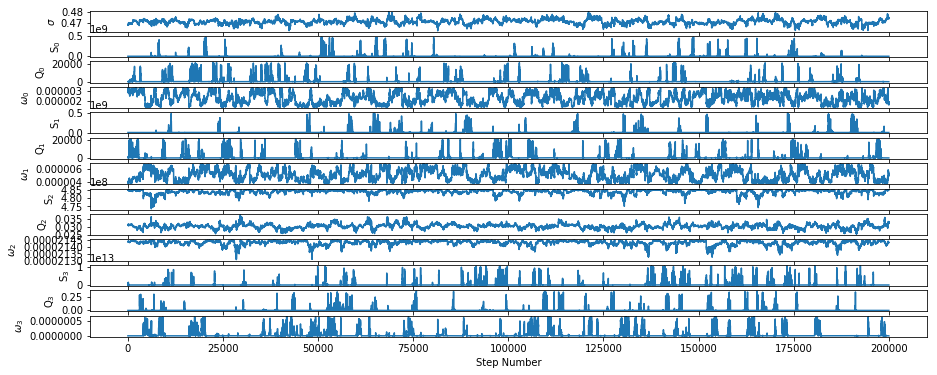

In [30]:
nparams = len(initial)
sam = sampler.flatchain
exp_sam = np.exp(sam)
print(np.shape(sam))
labels = ["$\\sigma$", "S$_0$", "Q$_0$", "$\\omega_0$", "S$_1$", "Q$_1$", "$\\omega_1$", "S$_2$", "Q$_2$", "$\\omega_2$", "S$_3$", "Q$_3$", "$\\omega_3$"]
fig, ax = plt.subplots(nparams, figsize=(15,6))
for i in range(nparams):
    ax[i].plot(exp_sam[:, i])
    ax[i].set_ylabel(labels[i])
    
ax[-1].set_xlabel('Step Number')

Import and plot corner.

$\sigma$ units: TBC

$S_0$ units: TBC

$Q_0$ units: unitless

$\omega$ units: rad/day

$\sigma$= 4.71535e-01 (+2.02126e-03 / -2.13901e-03)
$\S_0$= 7.85835e+01 (+3.58086e+05 / -7.85777e+01)
$Q_0$= 3.17419e-01 (+3.30062e+02 / -3.16845e-01)
$\omega_0$= 2.24802e-06 rad/s (+7.44923e-07 / -6.10590e-07) rad/s
Period: 32.349 days (+8.786 / -10.720) days


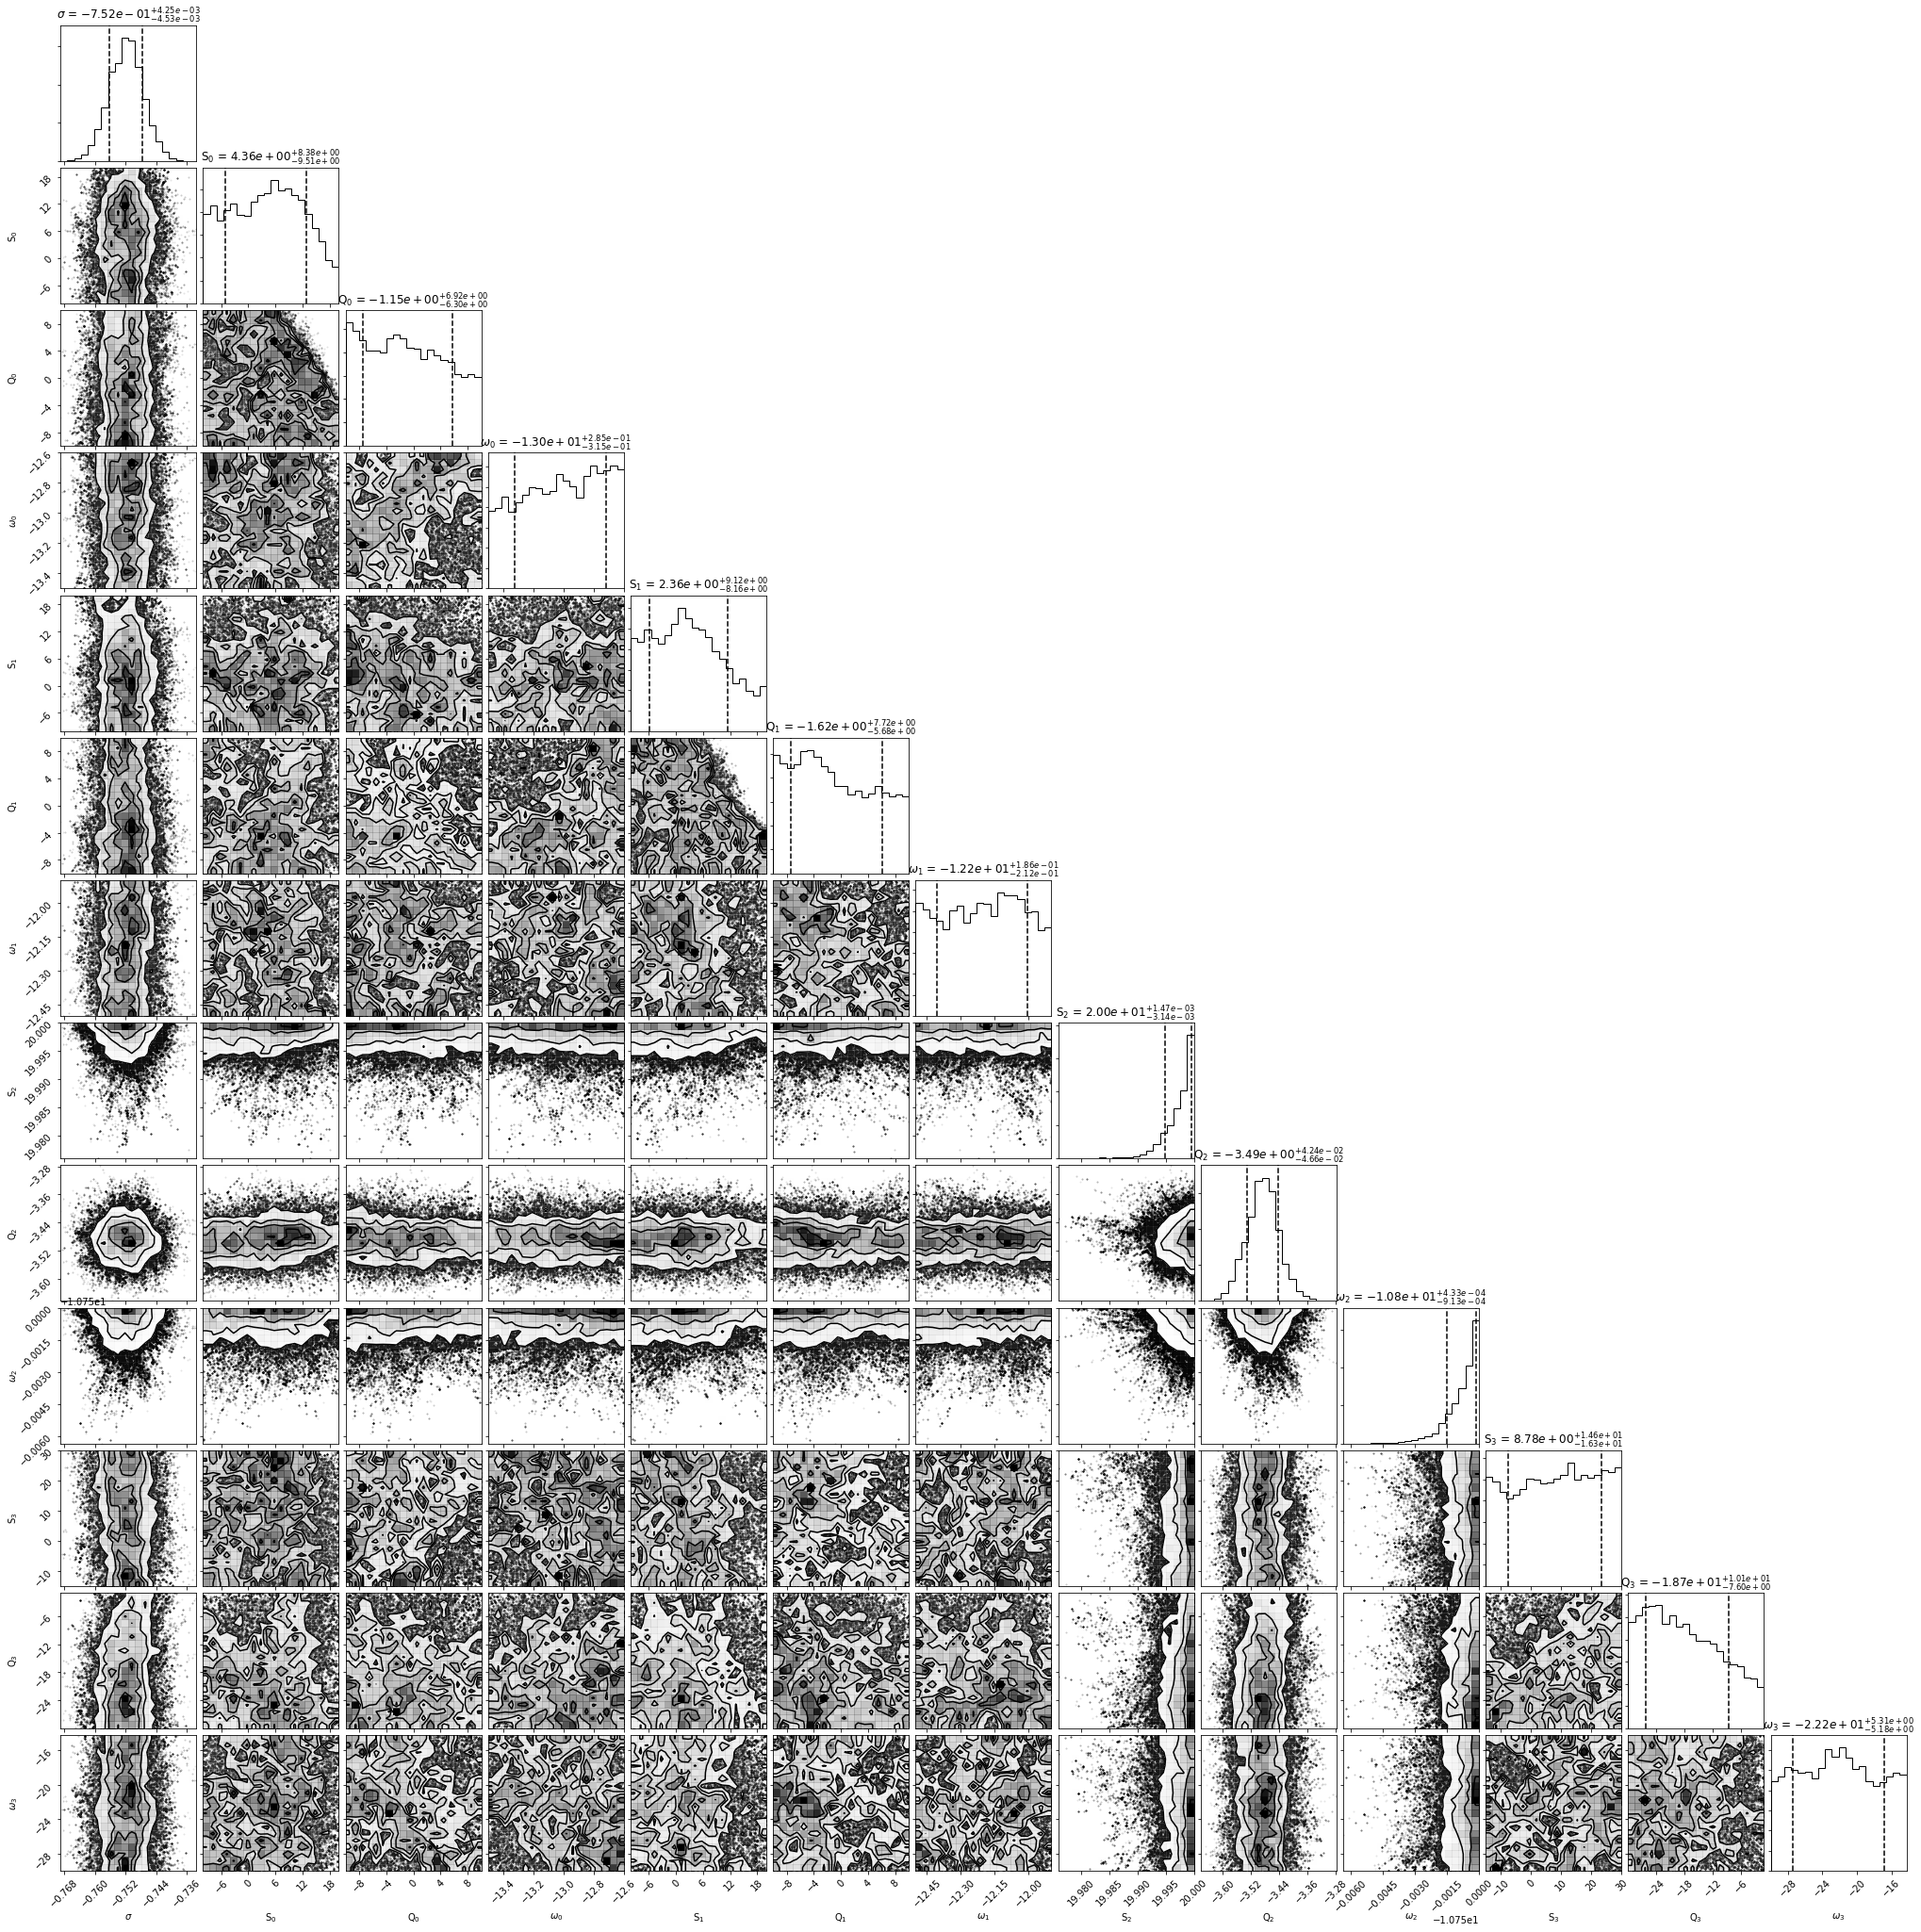

[4.77417298e-01 2.40436076e-02 2.10646851e-03 1.22036857e-06
 9.76424587e-06 6.27360466e-09 3.83557598e-06 4.86183443e+08
 3.68658749e-02 2.14310462e-05 7.96107561e+00 8.77370442e-15
 5.93935430e-16]


In [31]:
import corner

fit = np.percentile(exp_sam, 50, axis=0)
lower_std = abs(np.percentile(exp_sam, 50-34.13, axis=0) - fit)
upper_std = abs(np.percentile(exp_sam, 50+34.13, axis=0) - fit)

print("%s= %.5e (+%.5e / -%.5e)"%('$\sigma$', fit[0], upper_std[0], lower_std[0]))
print("%s= %.5e (+%.5e / -%.5e)"%('$\S_0$', fit[1], upper_std[1], lower_std[1]))
print("%s= %.5e (+%.5e / -%.5e)"%('$Q_0$', fit[2], upper_std[2], lower_std[2]))
print("%s= %.5e rad/s (+%.5e / -%.5e) rad/s"%('$\omega_0$', fit[3], upper_std[3], lower_std[3]))

prd = (1/(fit[3]/(2*np.pi)))/(24*3600)
prd_low = upper_std[3] * prd / fit[3] # use upp omega to get lower period (as inverse)
prd_upp = lower_std[3] * prd / fit[3] # use low omega to get upper period (as inverse)
print("Period: %.3f days (+%.3f / -%.3f) days"%(prd, prd_upp, prd_low))

corner.corner(sam,
                show_titles = True,
                labels = ["$\\sigma$", "S$_0$", "Q$_0$", "$\\omega_0$", "S$_1$", "Q$_1$", "$\\omega_1$", "S$_2$", "Q$_2$", "$\\omega_2$", "S$_3$", "Q$_3$", "$\\omega_3$"],
                quantiles = [0.5-0.3413, 0.5+0.3413], 
                title_fmt='.2e')
plt.savefig('GP_test_corner.png', dpi=300)
plt.show()

print(np.exp(gp.get_parameter_vector()))
#print("Period: %.6e"%model.P)
#print("Amplitude: %.6e"%model.A)

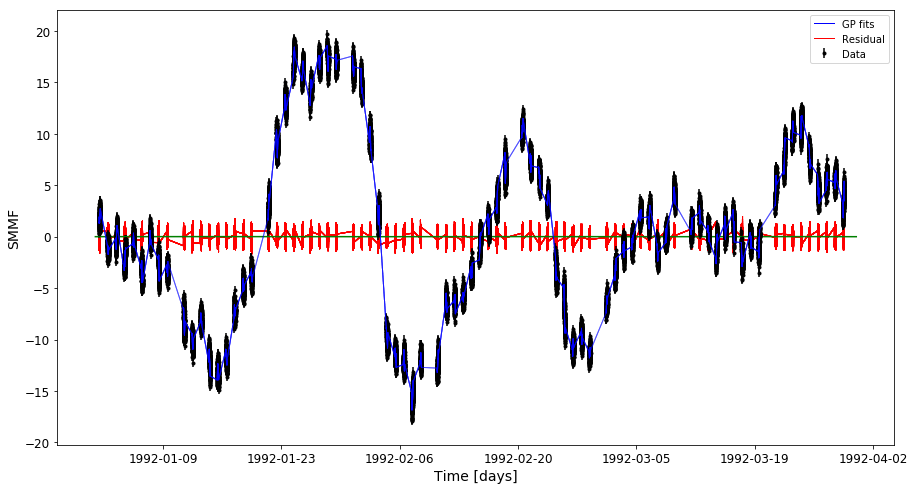

In [32]:
# Plot the data.
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel('Time [days]', fontsize=14)
ax.set_ylabel('SMMF', fontsize=14)
ax.tick_params(labelsize=12)

ax.errorbar(df_SMMF.index.values, df_SMMF['SMMF'].values, yerr=df_SMMF['yerr'], fmt=".k", capsize=0, label='Data', zorder=2)

#lp = like(t, df['SMMF'].values, yerr)
# Plot GP samples.
#samples = sampler.flatchain
itn = 0
for s in sam[np.random.randint(len(sam), size=53)]:
    gp.set_parameter_vector(s)
    mu = gp.predict(df_SMMF['SMMF'].values, df_SMMF['ts'], return_cov=False)
    if itn == 0:
        a = ax.plot(df_SMMF.index.values, mu, color='b', alpha=1, lw=1.0, label='GP fits', zorder=3)
        b = ax.plot(df_SMMF.index.values, df_SMMF['SMMF'].values - mu, color='r', alpha=1, lw=1.0, label='Residual', zorder=1)
        itn+=1
    else:
        a = ax.plot(df_SMMF.index.values, mu, color='b', alpha=0.1, lw=1.0, zorder=3)
        b = ax.plot(df_SMMF.index.values, df_SMMF['SMMF'].values - mu, color='r', alpha=1, lw=1.0, zorder=1)

ax.legend()

amp = np.sqrt(fit[1] * fit[2] * fit[3]) #sqrt(S0 * w0 * Q)
ax.plot(df.index.values, amp*np.sin(np.exp(gp.get_parameter_vector())[3]*ts), 'g', label='sinusoid at freq $\omega_0$')

#ax.plot(df.index.values, 5*np.sin(4.848E-6*ts))



No. kernel terms: 5


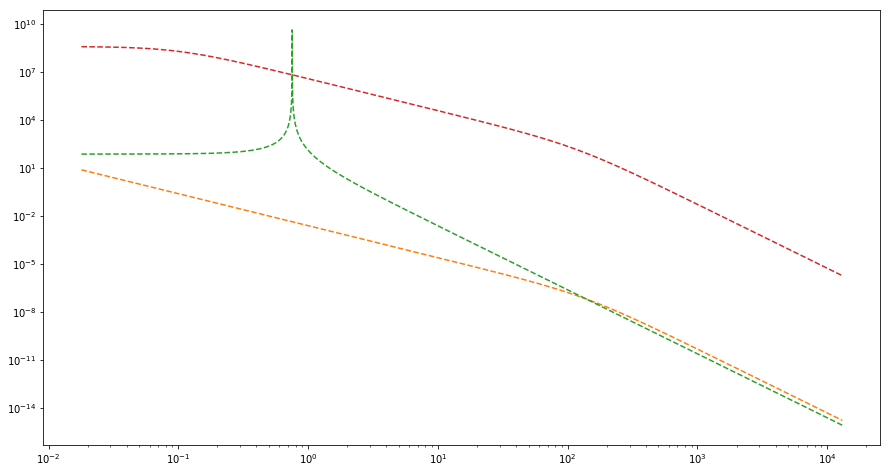

In [33]:
omega = np.exp(np.linspace(-16, -2.5, 5000))
psd = gp.kernel.get_psd(omega)
fig, ax = plt.subplots(figsize=(15,8))
print('No. kernel terms: %s'%len(gp.kernel.terms))
for k in gp.kernel.terms:
    ax.plot(1e6*omega/(2*np.pi), k.get_psd(omega), "--")
ax.set_xscale('log')
ax.set_yscale('log')

Now remove some of the data to make it more representative of real SMMF data

In [ ]:
x = np.arange(0, df_SMMF['ts'].values[-1], 200)
print(len(x))

pred_mean= gp.predict(df_SMMF['SMMF'].values, x, return_var=False, return_cov=True)
#pred_std = np.sqrt(pred_var)